# Description of Ant-V2 in MuJoCo

In [1]:
import gym,mujoco_py,warnings
# Remove annoying warning signs
gym.logger.set_level(40)
warnings.filterwarnings("ignore") 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
from custom_ant import AntEnvCustom
np.set_printoptions(precision=3)
print ("Packages Loaded")

Packages Loaded


### Open Ant-V2

In [2]:
env = AntEnvCustom()
obs_dim = env.observation_space.shape[0]
act_dim = env.action_space.shape[0]
env.reset() # Reset 
# render_img = env.render(mode='rgb_array')
print ("Environment initialized.")

Ant custom env -SJ
Environment initialized.


### In observations, 
#### (1) height z
#### (4) quartanion
#### (8) joint angle in rad

### Set pos and plot

Creating window glfw


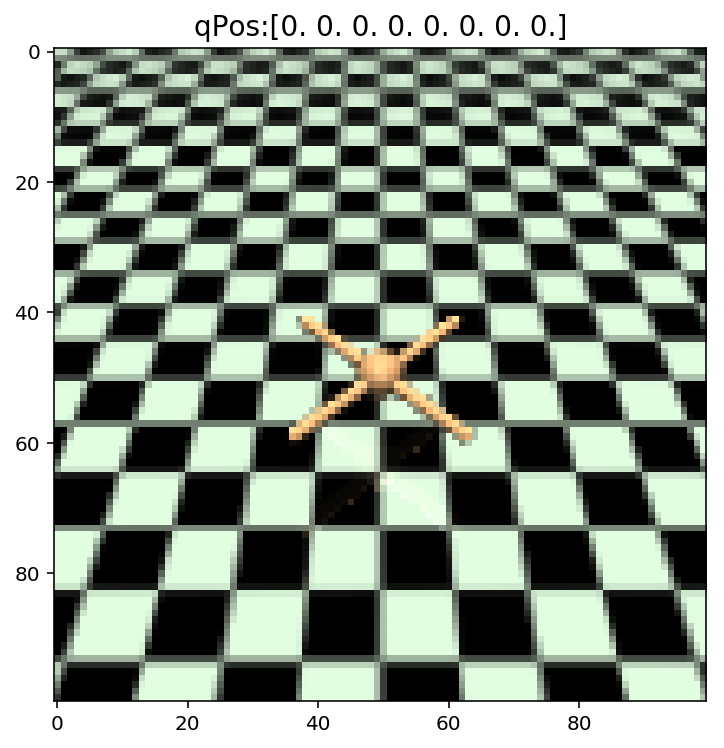

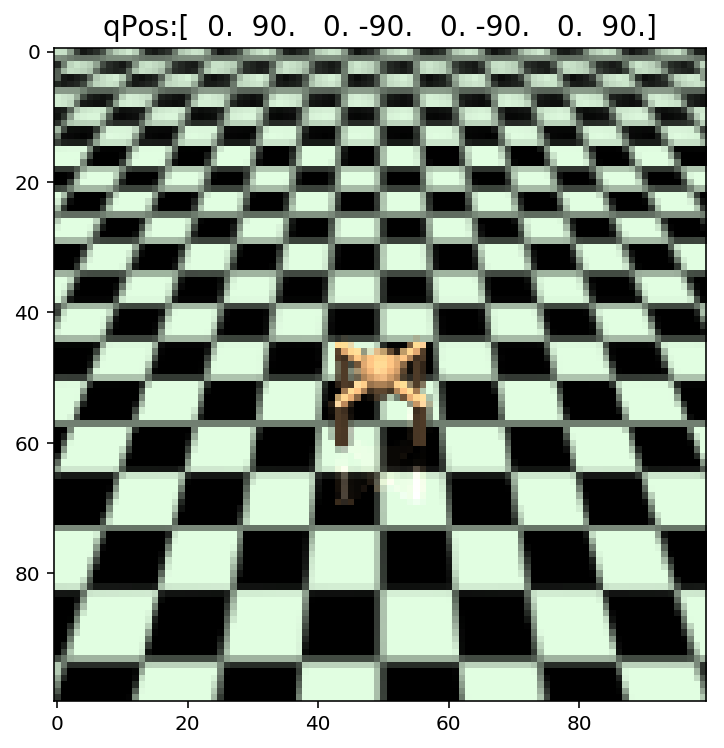

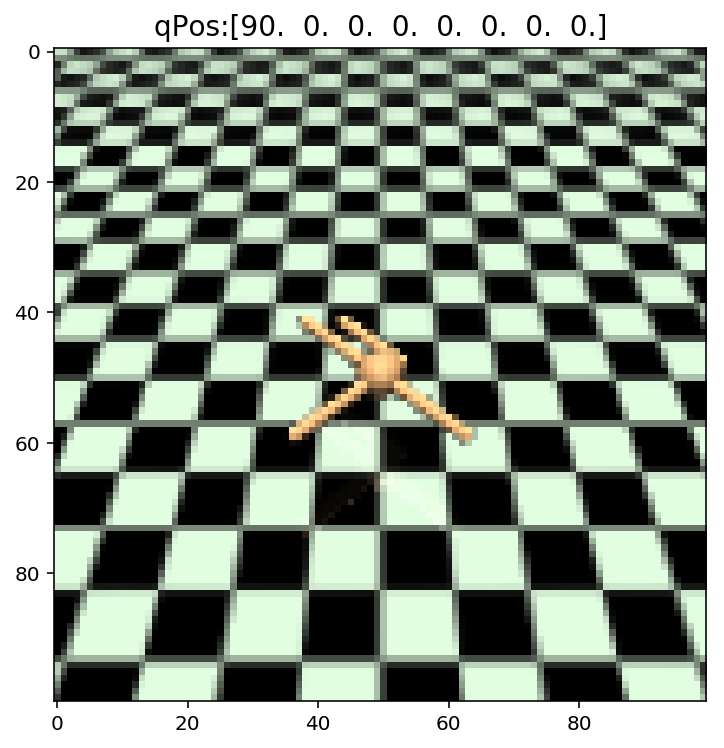

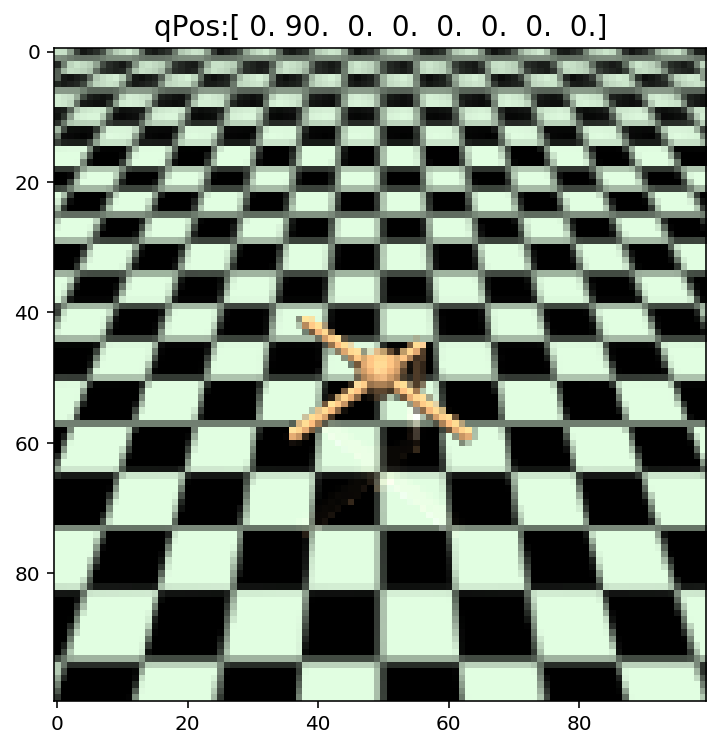

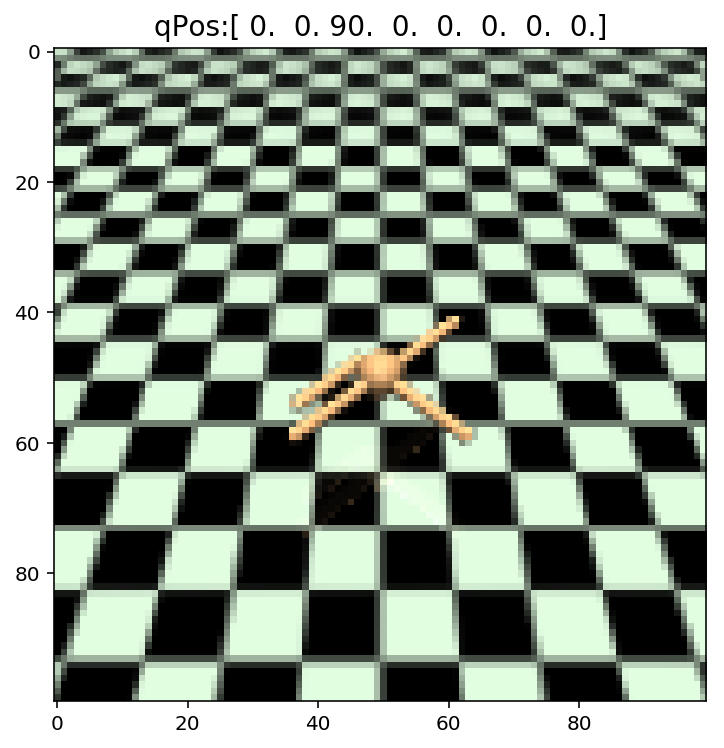

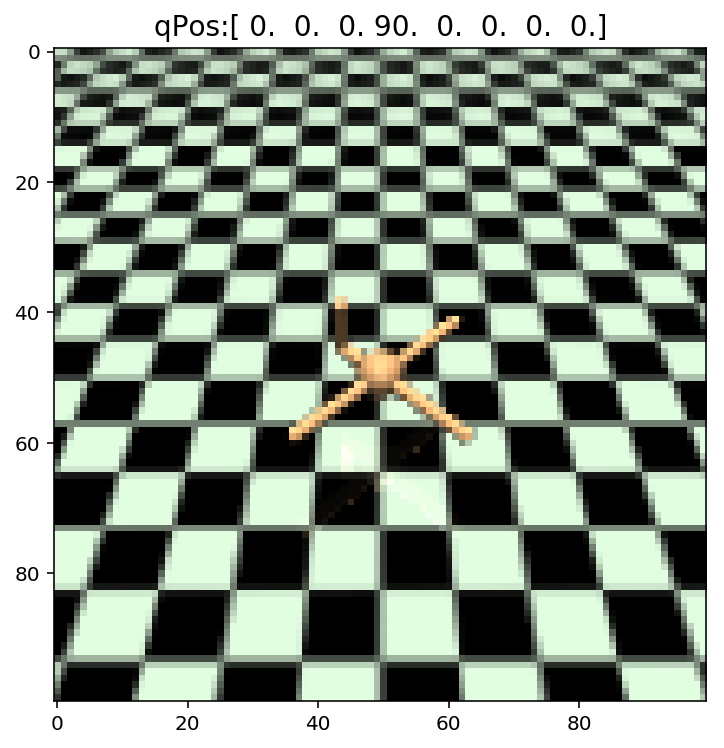

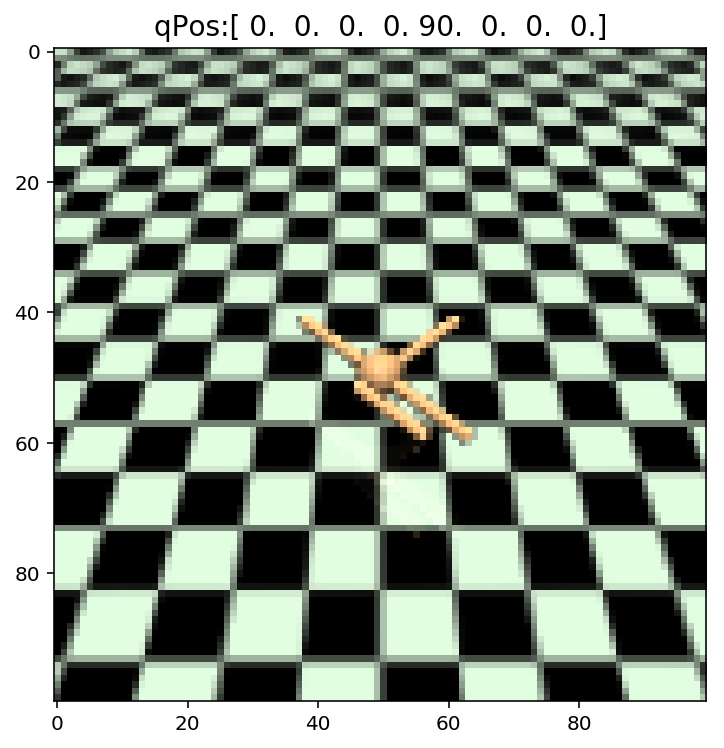

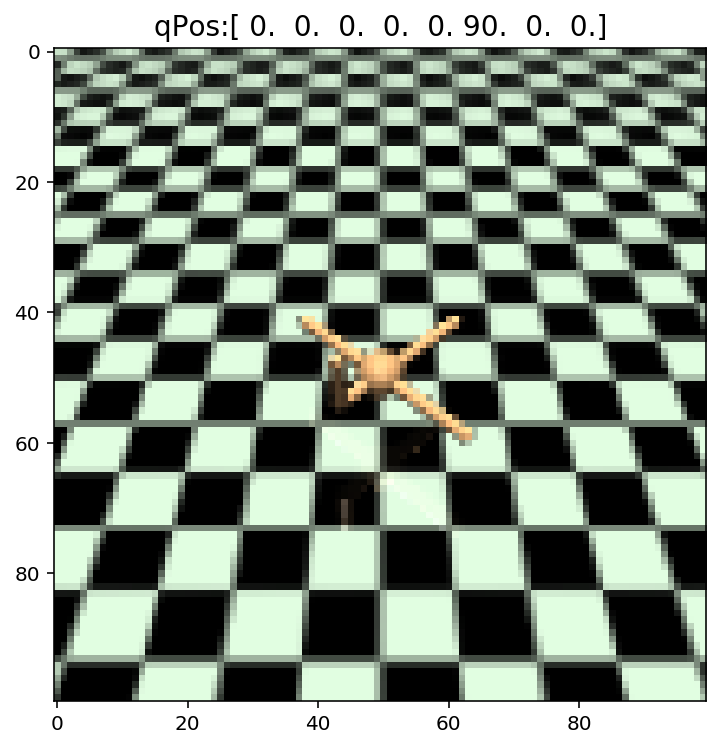

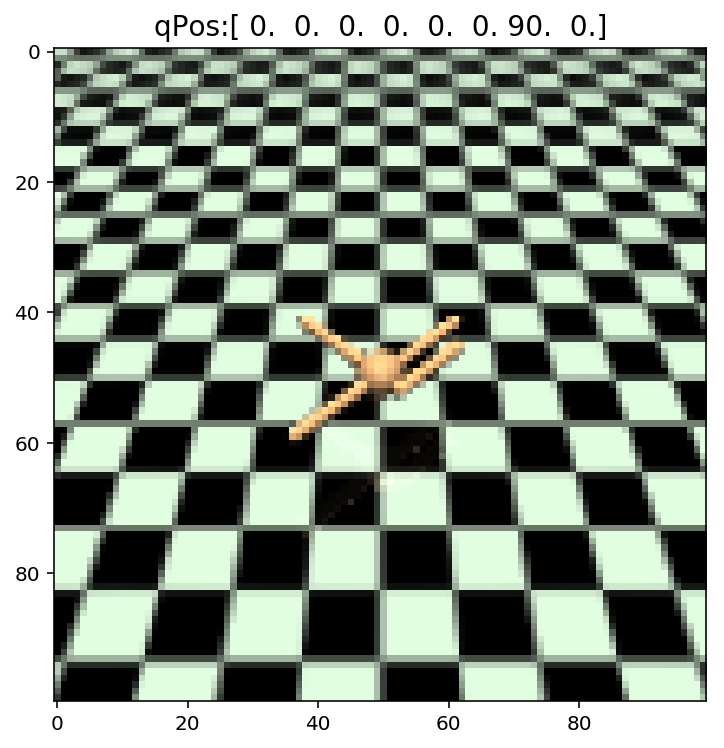

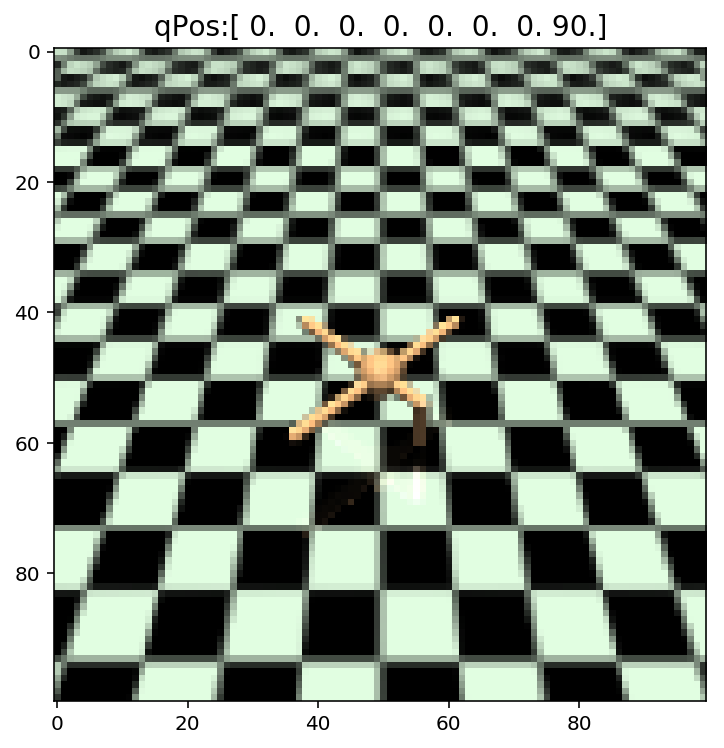

In [3]:
pos = env.init_qpos
jPosList = [[0,0,0,0,0,0,0,0],[0,90,0,-90,0,-90,0,90]
           ,[90,0,0,0,0,0,0,0],[0,90,0,0,0,0,0,0],[0,0,90,0,0,0,0,0]
           ,[0,0,0,90,0,0,0,0],[0,0,0,0,90,0,0,0],[0,0,0,0,0,90,0,0]
           ,[0,0,0,0,0,0,90,0],[0,0,0,0,0,0,0,90]]
for jPos in jPosList:
    # Modify joint postion (only)
    pos[7:] = np.asarray(jPos).astype(np.float32)*np.pi/180.0
    env.set_state(pos,env.init_qvel) # Init state
    # Plot
    render_img = env.render(mode='rgb_array',width=100,height=100)
    plt.figure(figsize=(6,6));plt.imshow(render_img);
    plt.title('qPos:%s'%(pos[7:]*180.0/np.pi),fontsize=14);plt.show()

### Set action and plot

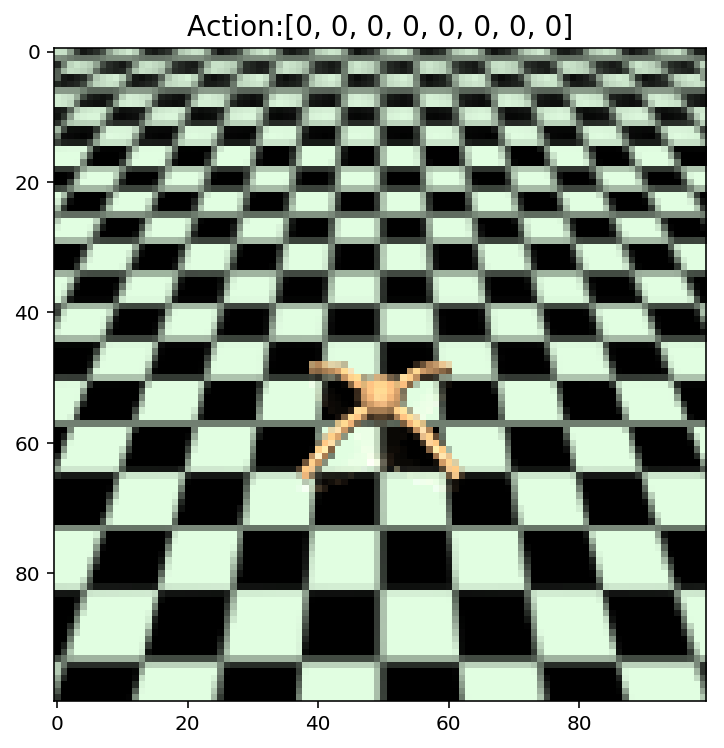

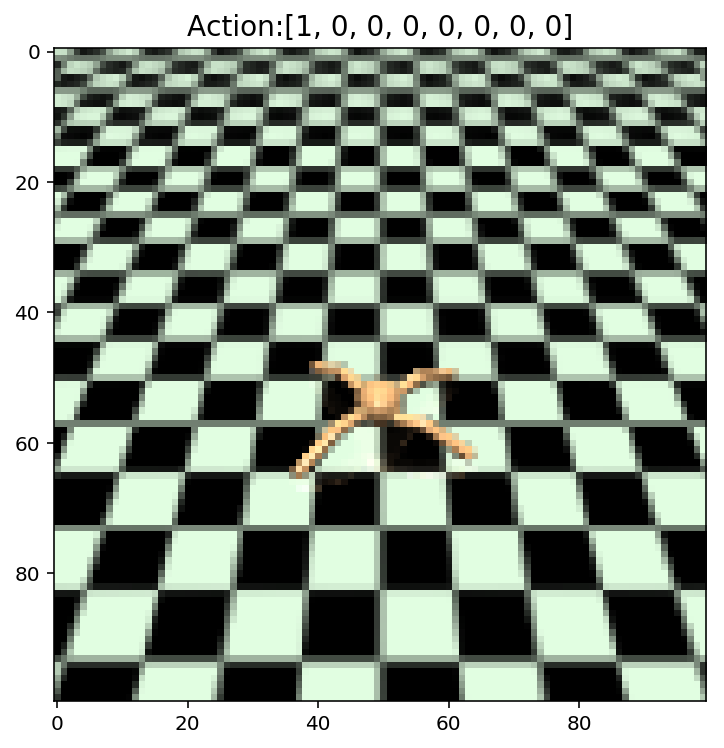

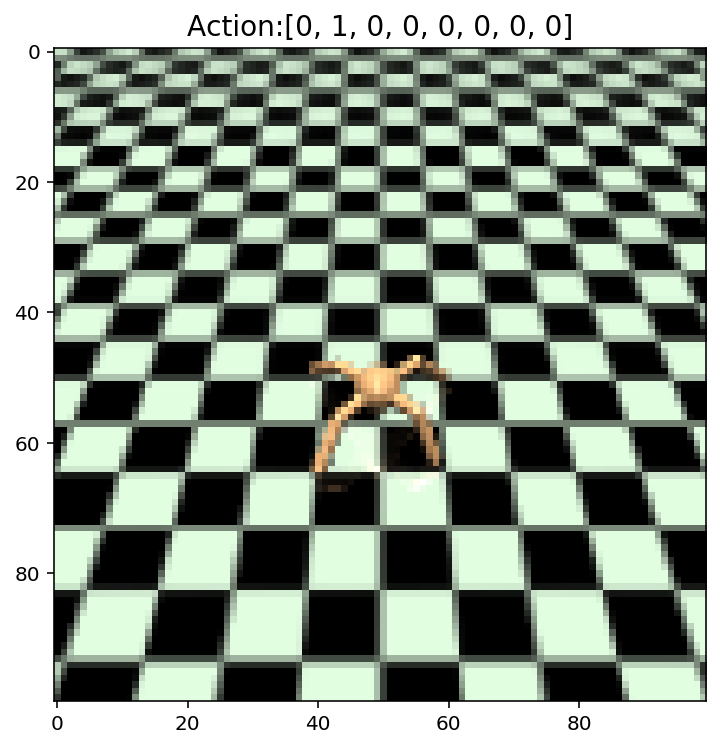

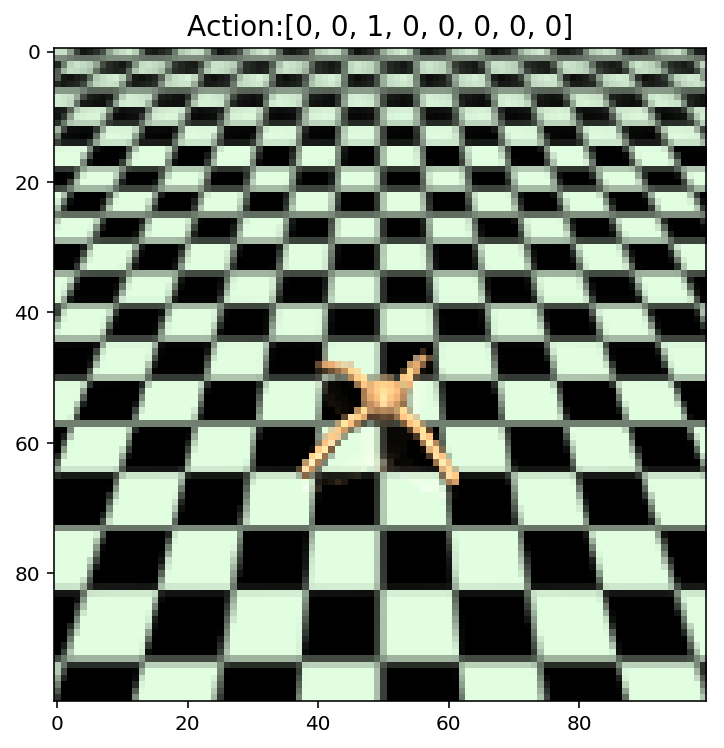

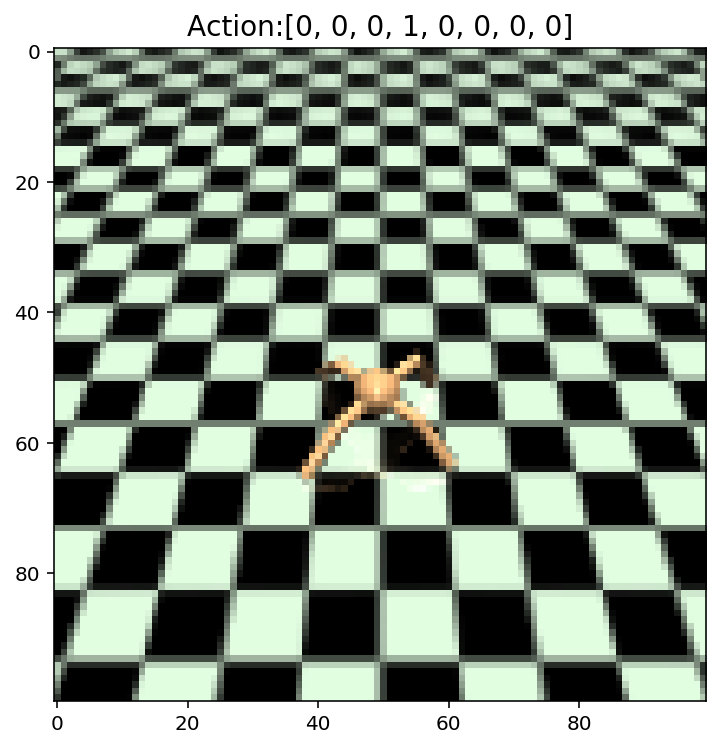

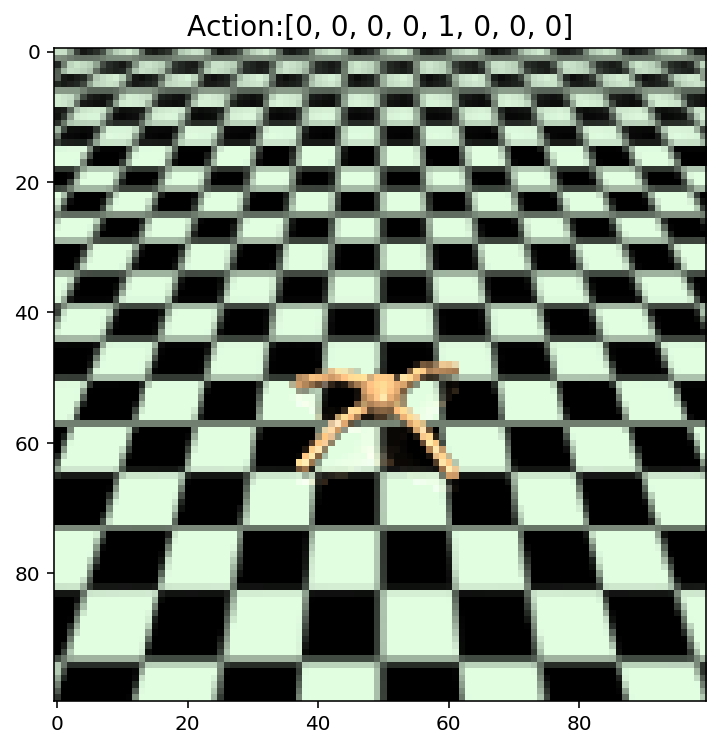

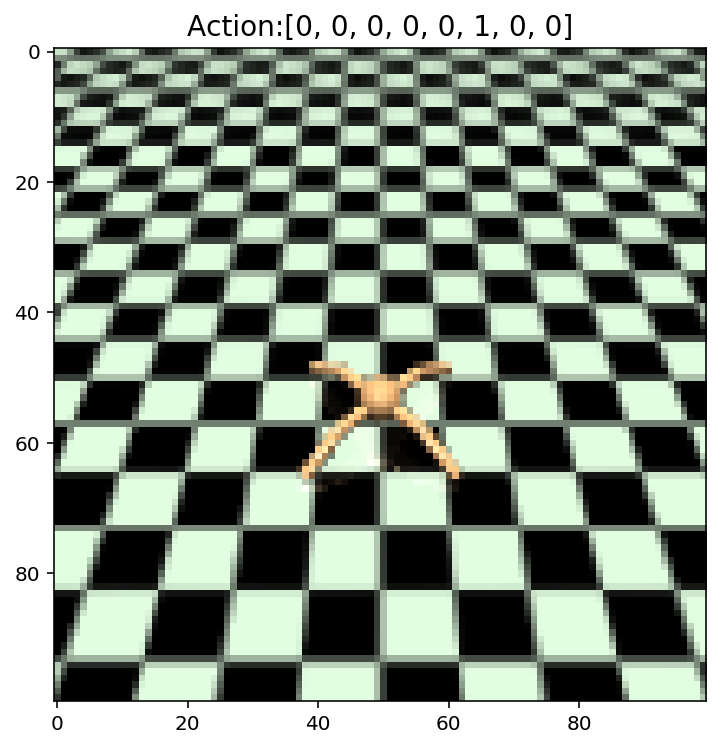

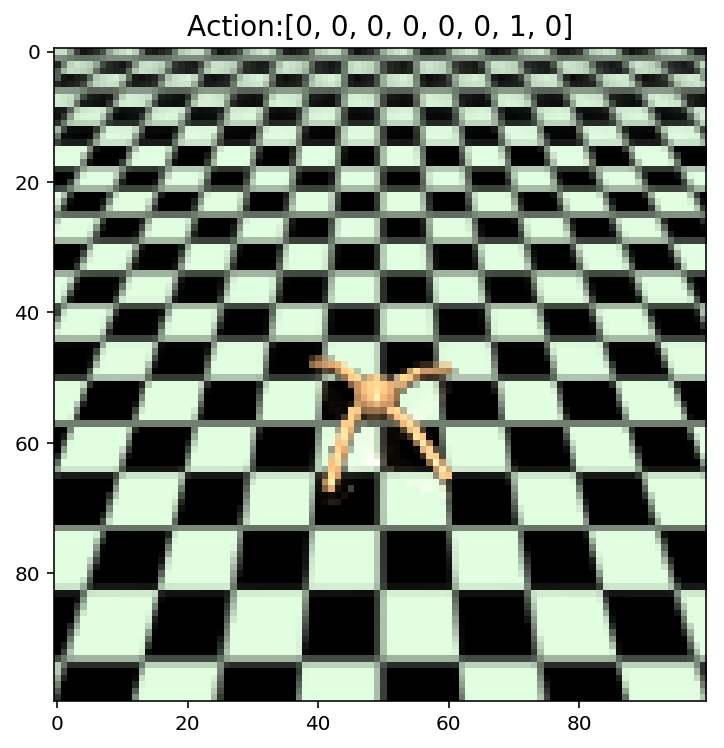

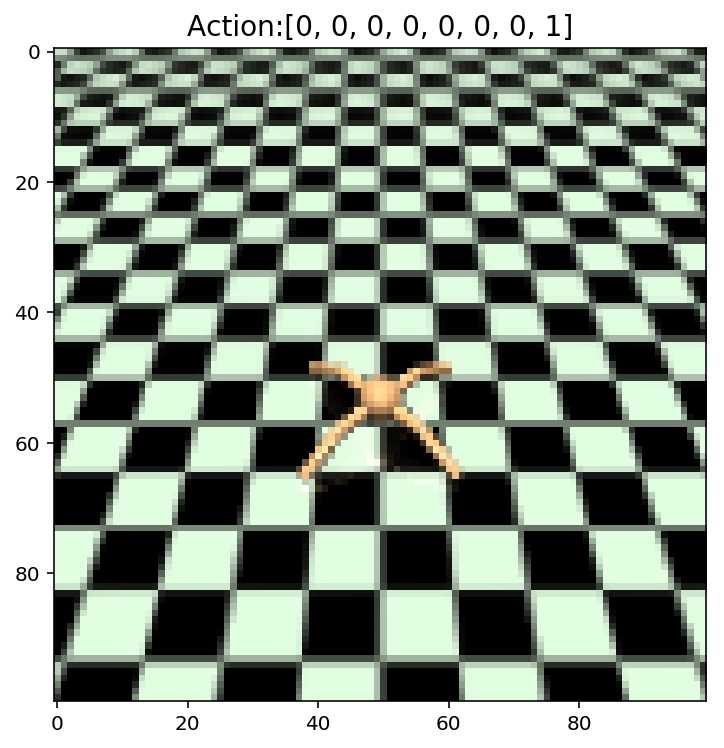

In [4]:
pos = env.init_qpos
actionList = [[0,0,0,0,0,0,0,0]
           ,[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0]
           ,[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0]
           ,[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
for action in actionList:
    # Init pos
    pos[7:] = np.asarray([0,90,0,-90,0,-90,0,90]).astype(np.float32)*np.pi/180.0
    env.reset()
    env.set_state(pos,env.init_qvel) # Init state
    for i in range(100):
        obs,reward,done,_ = env.step(np.asarray(action).astype(np.float16))
    # Plot
    render_img = env.render(mode='rgb_array',width=100,height=100)
    plt.figure(figsize=(6,6));plt.imshow(render_img);
    plt.title('Action:%s'%(action),fontsize=14);plt.show()

### Get time of MuJoCo

In [5]:
env.reset() # Reset
for tick in range(10):
    env.step(np.zeros(act_dim))
    t = env.sim.data.time
    print ('tick:[%d] time:[%.2f]sec'%(tick,t))

tick:[0] time:[0.05]sec
tick:[1] time:[0.10]sec
tick:[2] time:[0.15]sec
tick:[3] time:[0.20]sec
tick:[4] time:[0.25]sec
tick:[5] time:[0.30]sec
tick:[6] time:[0.35]sec
tick:[7] time:[0.40]sec
tick:[8] time:[0.45]sec
tick:[9] time:[0.50]sec


### Make display

In [6]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
def display_frames_as_gif(frames,_intv_ms=100,_figsize=(6,6),_fontsize=15):
    plt.figure(figsize=_figsize)
    patch = plt.imshow(frames[0])
    title = plt.title('[%d/%d]'%(0,len(frames)),fontsize=_fontsize)
    plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])
        title.set_text('[%d/%d]'%(i,len(frames)))
    anim = animation.FuncAnimation(plt.gcf(),animate,frames=len(frames),interval=_intv_ms)
    display(display_animation(anim,default_mode='loop'))
    !rm None0000000.png

Makeing GIF..



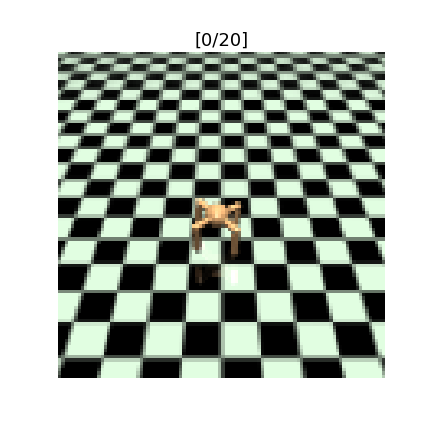
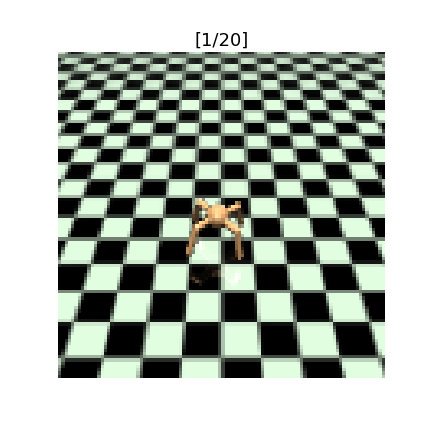
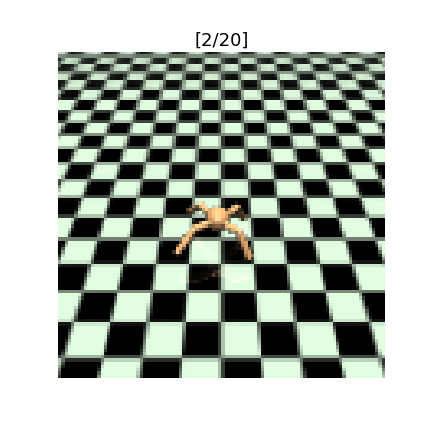
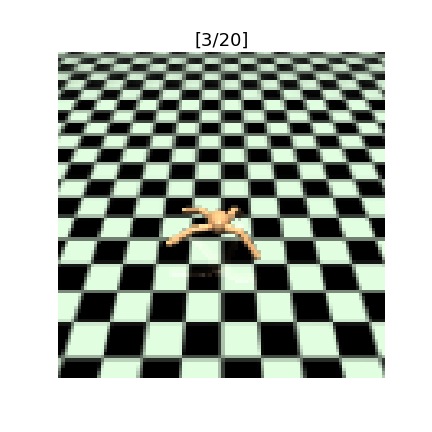
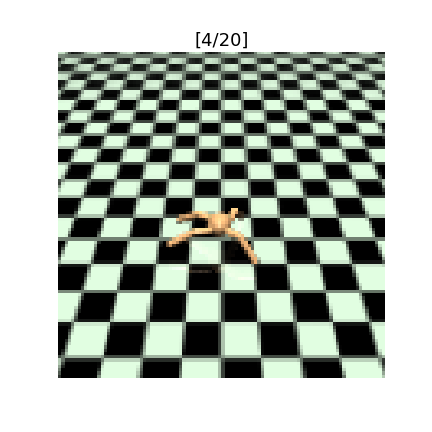
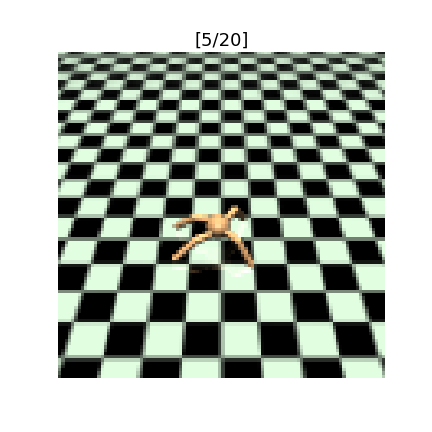
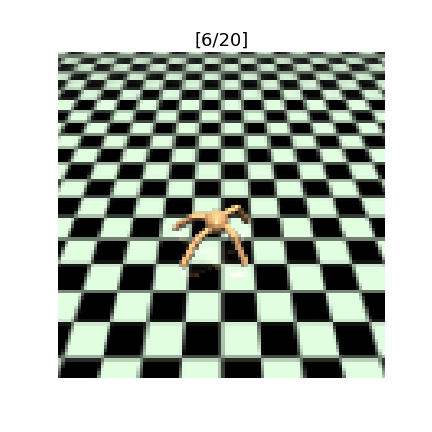
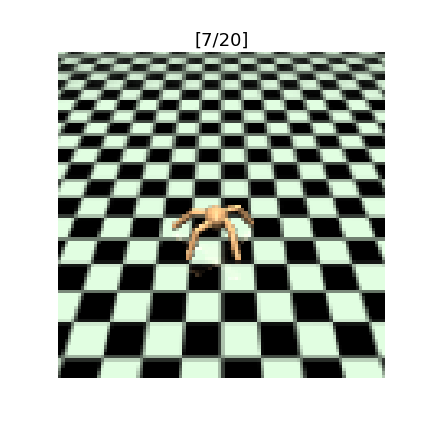
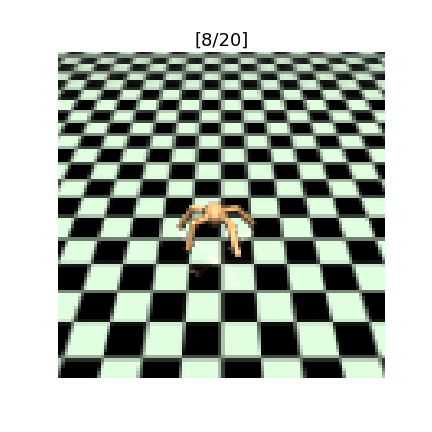
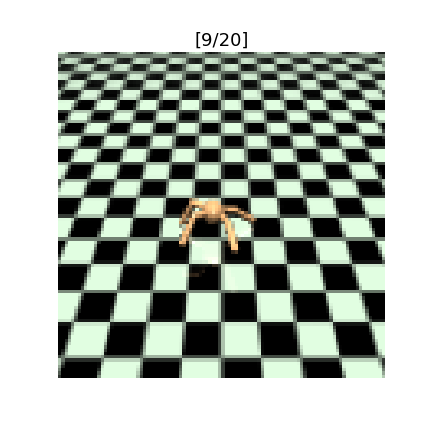
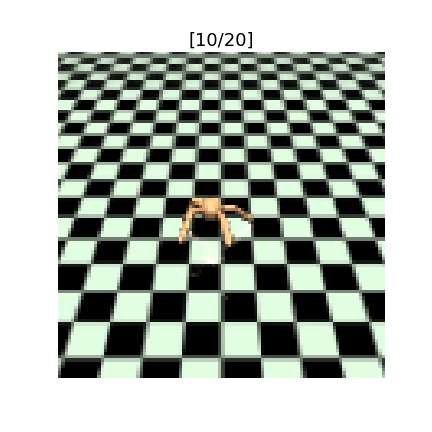
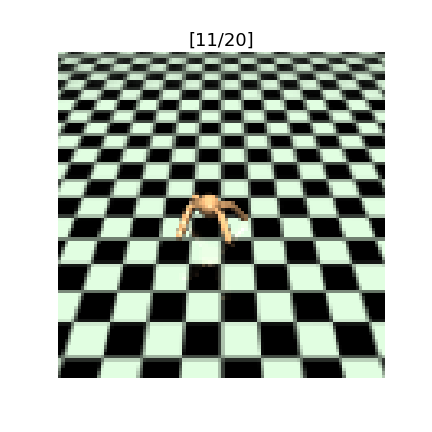
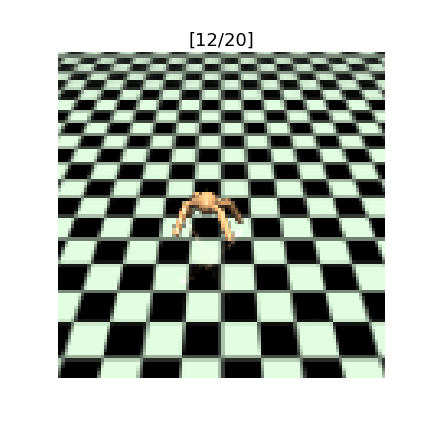
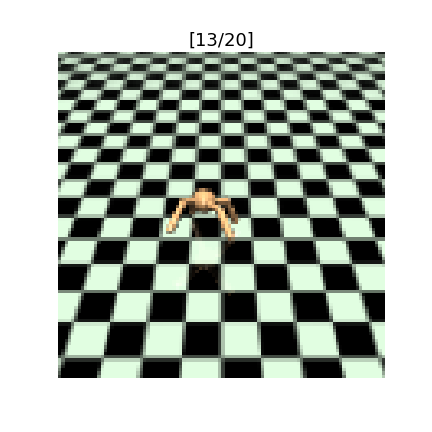
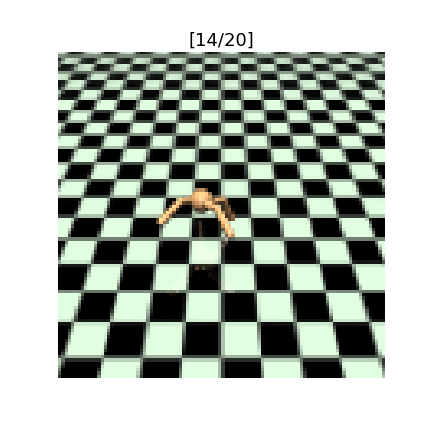
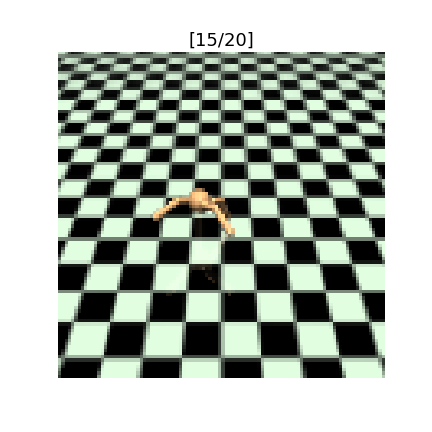
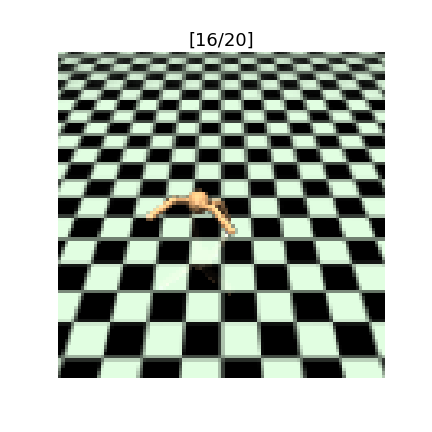
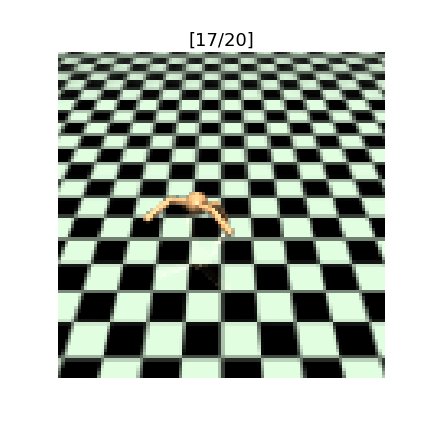
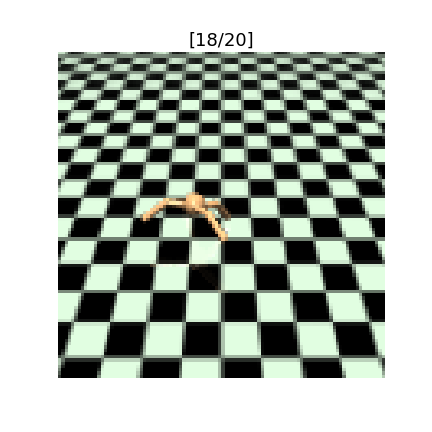
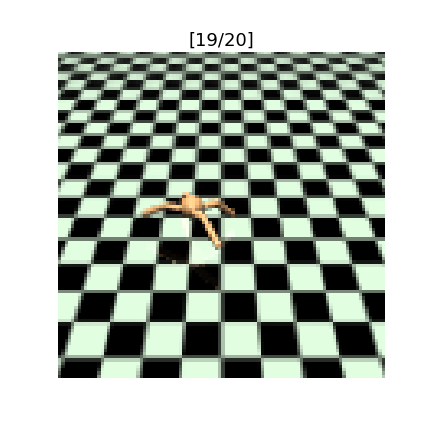

Done.


In [7]:
env.reset() # Reset
frames = []
for t in range(20):
    frames.append(env.render(mode='rgb_array',width=100,height=100))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
# env.close()
print ("Makeing GIF..")
display_frames_as_gif(frames,_intv_ms=50,_figsize=(6,6),_fontsize=18)
print ("Done.")

### Make video

In [8]:
import skvideo.io
outputdata = np.asarray(frames).astype(np.uint8)
skvideo.io.vwrite('vids/ant_demo.mp4', outputdata)
print ("Done.")

Done.
